In [2]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

# # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


In [3]:
def sequence_to_pdb(sequence='GCGACAGAGTA', name='my_dna', save_pdb=True):

    # Linear strand of control points 
    point = mdna.Shapes.line((len(sequence)-1)*0.34)
    # Convert the control points to a spline
    spline = mdna.SplineFrames(point)
    # Generate the DNA structure
    dna = mdna.StructureGenerator(sequence=sequence,spline=spline)

    # Edit the DNA structure to make it compatible with the AMBER force field
    traj = dna.traj
    phosphor_termini = traj.top.select(f'name P OP1 OP2 and resid 0 {traj.top.chain(0).n_residues}')
    all_atoms = traj.top.select('all')
    traj = traj.atom_slice([at for at in all_atoms if at not in phosphor_termini])

    # Save the DNA structure as pdb file
    if save_pdb:
        traj.save(f'./{name}.pdb')
    return traj

In [4]:

# Define the sequence
sequence = 'GCGACAGAGTA'

# Generate the pdb file
traj = sequence_to_pdb(sequence=sequence, name='my_dna', save_pdb=True)

/Users/thor/surfdrive/Projects/pymdna/pymdna/utils.py:193: RuntimeWarning: invalid value encountered in divide
  omega_normalized = np.where(omega_norm != 0, omega / omega_norm, omega)


In [5]:
# Visualize the DNA structure
view = nv.show_mdtraj(traj)
view

NGLWidget()

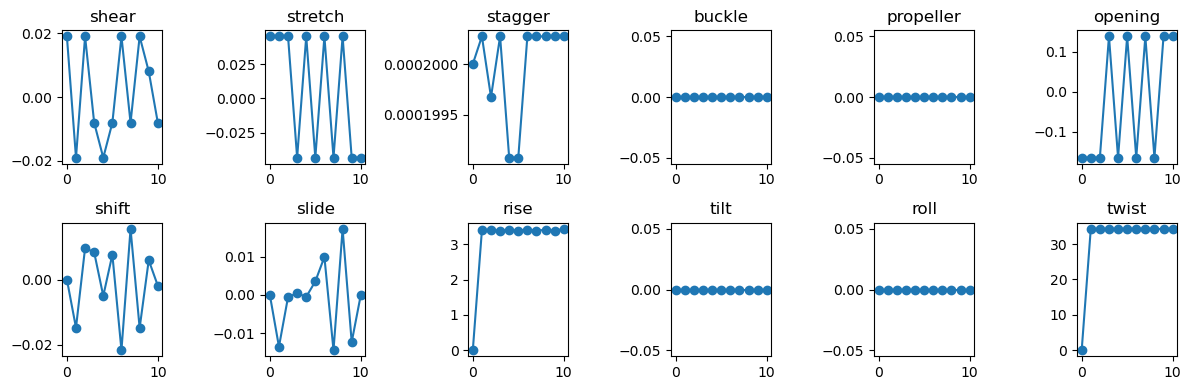

In [6]:
# # Calculate the helical parameters
nuc = mdna.NucleicFrames(traj)
params, names = nuc.get_paramters()

# # Plot the helical parameters
fig,ax = plt.subplots(2,6, figsize=[12,4])
ax = ax.flatten()
for _,name in enumerate(names):

    para = params[:,:,names.index(name)]
    ax[_].plot(np.mean(para, axis=0),'-o')    
    ax[_].set_title(name)
    
fig.tight_layout()